<a href="https://colab.research.google.com/github/Anuj123verma/Computer-Vision/blob/main/Lecture_5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algorothm For LBP

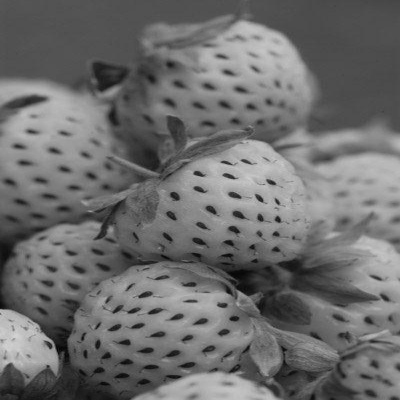

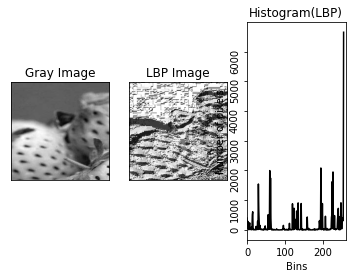

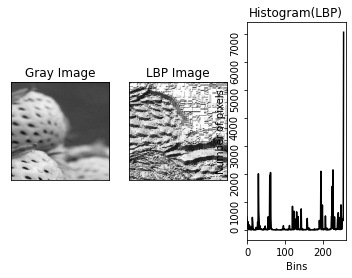

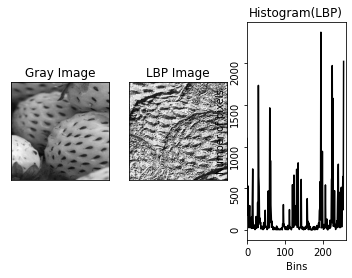

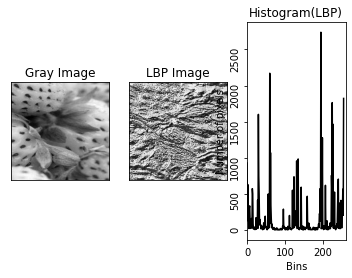

LBP Program is finished


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
def main():
    image_file = '/content/straw.png'
    img = cv2.imread(image_file)
    img = cv2.resize(img,(400,400))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img)
    img1 = img[0:200,0:200]
    img2 = img[0:200,200:400]
    img3 = img[200:400,0:200]
    img4 = img[200:400,200:400]
    for j in range(1,5):
      x=[]
      height=0;
      width=0
      if j==1:
        height, width = img1.shape
        x=img1
      if j==2:
        height, width = img2.shape
        x=img2
      if j==3:
        height, width = img3.shape
        x=img3
      if j==4:
        height, width = img4.shape
        x=img4
      img_lbp = np.zeros((height, width), np.uint8)
      for i in range(0, height):
          for j in range(0, width):
              img_lbp[i, j] = lbp_calculated_pixel(x, i, j)
      hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
      # print(hist_lbp)
      output_list = []
      output_list.append({
          "img": x,
          "xlabel": "",
          "ylabel": "",
          "xtick": [],
          "ytick": [],
          "title": "Gray Image",
          "type": "gray"        
      })
      output_list.append({
          "img": img_lbp,
          "xlabel": "",
          "ylabel": "",
          "xtick": [],
          "ytick": [],
          "title": "LBP Image",
          "type": "gray"
      })    
      output_list.append({
          "img": hist_lbp,
          "xlabel": "Bins",
          "ylabel": "Number of pixels",
          "xtick": None,
          "ytick": None,
          "title": "Histogram(LBP)",
          "type": "histogram"
      })

      show_output(output_list)
                              
      cv2.waitKey(0)
      cv2.destroyAllWindows()
    print("LBP Program is finished")

if __name__ == '__main__':
    main()